# 시그모이드 함수 (Sigmoid Function)

### 개념 요약
시그모이드 함수는 임의의 실수 입력값을 0과 1 사이의 값으로 변환(mapping)하는 비선형(non-linear) 함수임. 이 특성 때문에 특정 입력에 대한 확률을 나타내는 데 유용하게 사용되며, 특히 로지스틱 회귀나 인공 신경망의 이진 분류(binary classification) 문제에서 출력층의 활성화 함수(activation function)로 널리 사용됨.

그래프 모양이 S자와 유사하여 'S자형 함수'라고도 불림. 입력값이 양수 방향으로 커질수록 1에 가까워지고, 음수 방향으로 커질수록 0에 가까워지며, 입력값이 0일 때 0.5의 값을 가짐.

### 📐 수학적 배경
시그모이드 함수 $\sigma(x)$와 그 미분은 다음과 같이 정의됨. 미분 결과가 원래 함수를 사용하여 간단하게 표현된다는 특징이 있음.

1. **시그모이드 함수(Sigmoid Function):**
$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

2. **시그모이드 함수의 미분(Derivative):**
$$ \sigma'(x) = \sigma(x)(1 - \sigma(x)) $$

* $x$: 함수의 입력값
* $e$: 자연로그의 밑 (오일러 수, 약 2.718)
* $\sigma'(x)$: 역전파(backpropagation) 과정에서 경사(gradient)를 계산할 때 사용됨

### 라이브러리 임포트 (Setup)

In [1]:
# !pip install numpy matplotlib

import numpy as np
import matplotlib.pyplot as plt

### 예제 데이터 준비 (Data Preparation)
시그모이드 함수의 형태와 그 미분 그래프를 그리기 위해 x축의 입력값으로 사용할 데이터 범위를 생성함.

In [2]:
# -10부터 10까지 100개의 점을 생성하여 x 데이터로 사용
x_data = np.linspace(-10, 10, 100)
print(f"입력 데이터 (x_data) shape: {x_data.shape}")

입력 데이터 (x_data) shape: (100,)


### 핵심 로직 구현 (Code Implementation)
NumPy를 사용하여 시그모이드 함수와 그 미분을 코드로 구현함.

In [3]:
# 시그모이드 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 시그모이드 함수의 미분 정의
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# 준비된 데이터에 시그모이드 함수 적용
sigmoid_output = sigmoid(x_data)
derivative_output = sigmoid_derivative(x_data)

# 주요 입력값에 대한 출력 확인
input_val = 0
output_val = sigmoid(input_val)
print(f"입력값(x) = {input_val}, 시그모이드 출력값 = {output_val:.4f}")

input_val = -5
output_val = sigmoid(input_val)
print(f"입력값(x) = {input_val}, 시그모이드 출력값 = {output_val:.4f}")

input_val = 5
output_val = sigmoid(input_val)
print(f"입력값(x) = {input_val}, 시그모이드 출력값 = {output_val:.4f}")

입력값(x) = 0, 시그모이드 출력값 = 0.5000
입력값(x) = -5, 시그모이드 출력값 = 0.0067
입력값(x) = 5, 시그모이드 출력값 = 0.9933


### 📊 결과 확인 및 시각화 (Results & Visualization)
시그모이드 함수와 그 미분 함수의 그래프를 시각화하여 형태와 특징을 직관적으로 확인함.

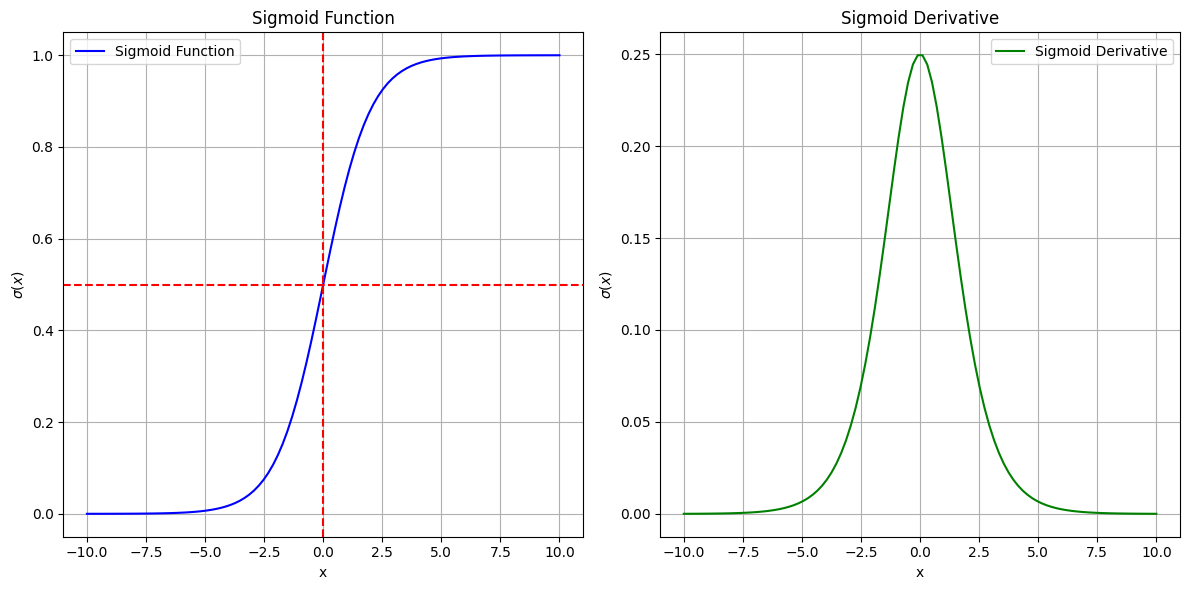

In [5]:
plt.figure(figsize=(12, 6))

# 시그모이드 함수 그래프
plt.subplot(1, 2, 1)
plt.plot(x_data, sigmoid_output, label='Sigmoid Function', color='blue')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('$\sigma(x)$')
plt.grid(True)
plt.axhline(y=0.5, color='r', linestyle='--') # y=0.5 수평선 추가
plt.axvline(x=0, color='r', linestyle='--') # x=0 수직선 추가
plt.legend()

# 시그모이드 미분 함수 그래프
plt.subplot(1, 2, 2)
plt.plot(x_data, derivative_output, label='Sigmoid Derivative', color='green')
plt.title('Sigmoid Derivative')
plt.xlabel('x')
plt.ylabel('$\sigma (x)$')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### 고려사항 (Considerations)

* <b>기울기 소실(Vanishing Gradient) 문제</b>: 시그모이드 함수는 입력값의 절댓값이 커질수록(예: x > 5 또는 x < -5) 미분값(기울기)이 0에 가까워지는 특성이 있음. 심층 신경망(Deep Neural Network)에서 역전파 시, 이러한 작은 기울기가 여러 층을 거치며 곱해지면 최종적으로 앞단에는 거의 0에 가까운 기울기가 전달되어 파라미터 업데이트가 거의 일어나지 않는 '기울기 소실' 문제가 발생할 수 있음.
* **대안 활성화 함수**: 위 문제를 해결하기 위해, 심층 신경망의 은닉층(hidden layer)에서는 시그모이드 대신 ReLU(Rectified Linear Unit)나 그 변형 함수들이 주로 사용됨.

### 최종 요약 (Conclusion)
시그모이드 함수는 입력값을 (0, 1) 범위의 확률 값으로 해석할 수 있게 해주는 S자 형태의 활성화 함수임. 이진 분류 모델의 최종 출력층에 적용하여 '예(1)' 또는 '아니오(0)'일 확률을 나타내는 데 매우 효과적임.

하지만 미분값의 최대치가 0.25이고 입력값이 특정 범위를 벗어나면 기울기가 0에 수렴하는 단점 때문에, 깊은 신경망의 은닉층에서는 기울기 소실 문제를 유발할 수 있음. 이러한 특성을 이해하고 문제에 맞는 활성화 함수를 선택하는 것이 중요함.